In [1]:
import numpy as np
import matplotlib.pyplot as plt
#for generating random numbers
from numpy.random import seed, randint
from functions import generate_single_exp, stretch_exp_fit, double_exp_fit, single_exp_fit
import math
import pandas as pd
from scipy.stats import skewnorm

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

### Generate skewed normal random array of lifetime values

In [3]:
seed(10)
# tau_vals = randint(1,1000,100)*1e-9 # convert to s
# create a skewed noraml distribution
tau_vals = skewnorm.rvs(a = 10, loc = 50, scale=100, size=100) *1e-9

In [4]:
np.average(tau_vals)

1.245844614013999e-07

Text(0.5, 0, 'Tau values (ns)')

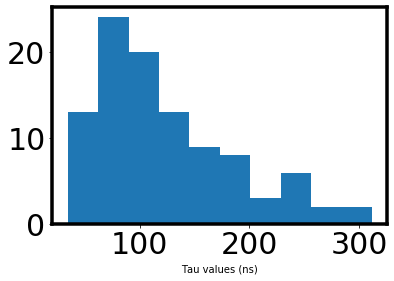

In [5]:
plt.figure()
plt.hist(tau_vals*1e9)
plt.xlabel("Tau values (ns)")

### Generate time array

In [6]:
t = np.linspace(0,10000,num=1000)*1e-9 # converted to s

### Generate single exponentials and average them to see the stretched behavior

In [7]:
I_vals = []

for i in range(len(tau_vals)):
    I_vals.append(generate_single_exp(t,tau_vals[i]))
    
I_vals = np.asarray(I_vals)
#Average Trace
I_avg = np.average(I_vals,axis=0)

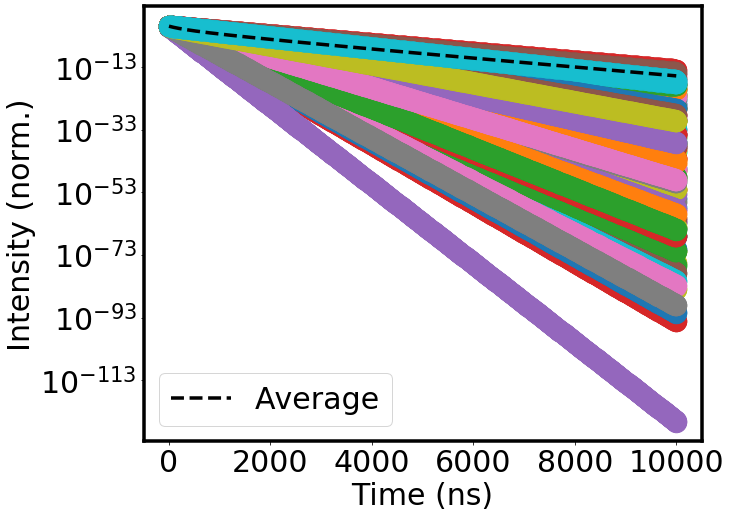

In [8]:
plt.figure(figsize=(10,8))
for i in range(len(tau_vals)):
    plt.plot(t*1e9,I_vals[i],'o')
plt.plot(t*1e9,I_avg,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Fit average decay with stretched exponential, double exponential and single exponential 

In [9]:
stretched_exp = stretch_exp_fit(I_avg/np.max(I_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 98.05116089187469
Beta = 0.766755488017277
avg. tau (ns) = 114.68644355964896


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: invalid value encountered in multiply
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [10]:
double_exp = double_exp_fit(I_avg/np.max(I_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 89.76252517362151
a1 = 0.7155310482882639
tau2 (ns) = 227.7375896008617
a2 = 0.2654173657440872
avg. tau (ns) = 127.09474123594453


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [11]:
single_exp = single_exp_fit(I_avg/np.max(I_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 167.25040458476545
a = 0.7678197994362839
avg. tau (ns) = 167.25040458476545


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:132: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)))


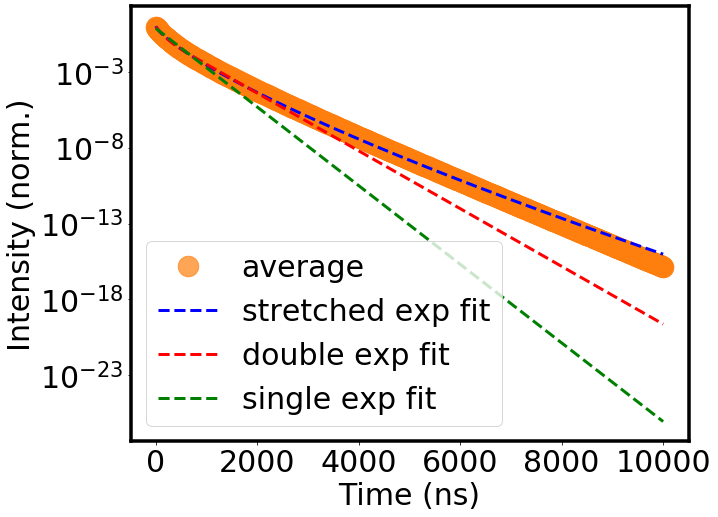

In [12]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, I_avg/np.max(I_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Create a random np array of 20 lifetimes with values far apart from one another

In [13]:
tau_far = np.array([400, 955, 422, 49, 544, 245, 111, 643, 765, 976, 1002, 408, 87, 872, 175, 303, 645, 226, 677, 788])*1e-9

In [14]:
tau_far

array([4.000e-07, 9.550e-07, 4.220e-07, 4.900e-08, 5.440e-07, 2.450e-07,
       1.110e-07, 6.430e-07, 7.650e-07, 9.760e-07, 1.002e-06, 4.080e-07,
       8.700e-08, 8.720e-07, 1.750e-07, 3.030e-07, 6.450e-07, 2.260e-07,
       6.770e-07, 7.880e-07])

In [15]:
np.average(tau_far)

5.1465e-07

Text(0.5, 0, 'Tau values (ns)')

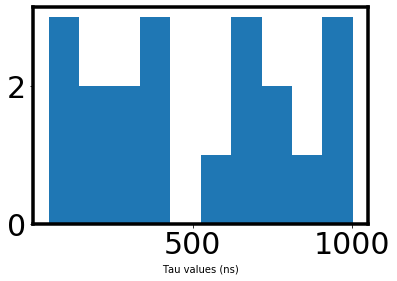

In [16]:
plt.figure()
plt.hist(tau_far*1e9)
plt.xlabel("Tau values (ns)")

### Take the average of all the single exponetial of each of the 20 lifetimes

In [17]:
t_far = np.linspace(0,10000,num=1000)*1e-9

In [18]:
I_values = []

for i in range(len(tau_far)):
    I_values.append(generate_single_exp(t_far,tau_far[i]))
    
I_values = np.asarray(I_values)
I_average = np.average(I_values,axis=0)

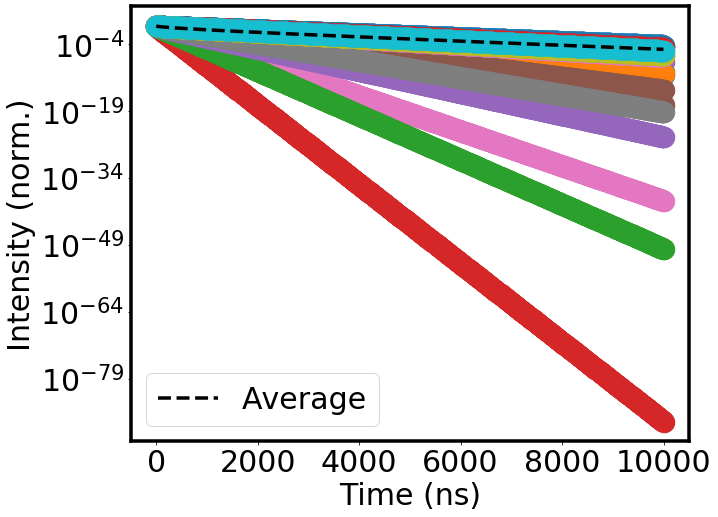

In [19]:
plt.figure(figsize=(10,8))
for i in range(len(tau_far)):
    plt.plot(t_far*1e9,I_values[i],'o')
plt.plot(t_far*1e9,I_average,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [20]:
far_stretched_exp = stretch_exp_fit(I_average/np.max(I_average), t_far)
print("tau_c (ns) = "+str(far_stretched_exp[0]*1e9))
print("Beta = "+str(far_stretched_exp[1]))
print("avg. tau (ns) = "+str(far_stretched_exp[3]*1e9))

tau_c (ns) = 452.78695241665577
Beta = 0.7809074868414132
avg. tau (ns) = 522.1997086754274


In [21]:
far_double_exp = double_exp_fit(I_average/np.max(I_average), t_far)
print("tau1 (ns) = "+str(far_double_exp[0]*1e9))
print("a1 = "+str(far_double_exp[1]))
print("tau2 (ns) = "+str(far_double_exp[2]*1e9))
print("a2 = "+str(far_double_exp[3]))
print("avg. tau (ns) = "+str(far_double_exp[4]*1e9))

tau1 (ns) = 837.0606018471466
a1 = 0.4662390465760126
tau2 (ns) = 261.75706195336835
a2 = 0.47732394748037754
avg. tau (ns) = 546.0295224265798


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [22]:
far_single_exp = single_exp_fit(I_average/np.max(I_average), t_far)
print("tau (ns) = "+str(far_single_exp[0]*1e9))
print("a = "+str(far_single_exp[1]))
print("avg. tau (ns) = "+str(far_single_exp[2]*1e9))

tau (ns) = 706.708204949496
a = 0.7374933140375447
avg. tau (ns) = 706.708204949496


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:132: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


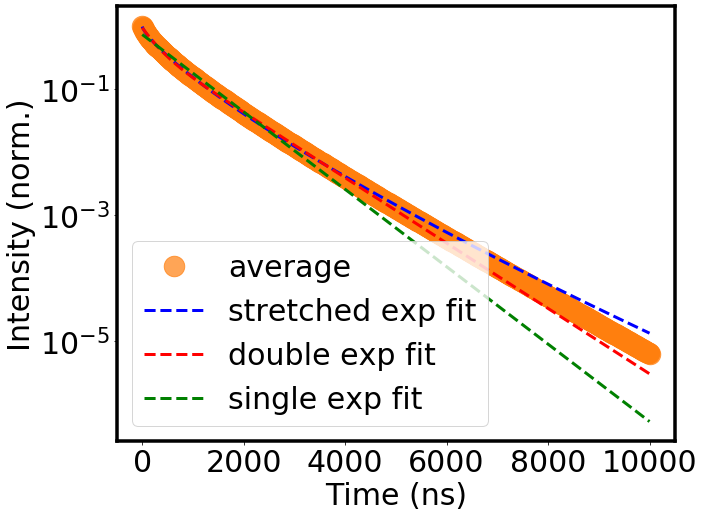

In [23]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t_far*1e9, I_average/np.max(I_average),'C1o', alpha=0.7,label="average")
plt.plot(t_far*1e9, far_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_far*1e9, far_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_far*1e9, far_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Calculate the SRV for each lifetime of the 20 data series

From *Jian, Sarthak, ACS Energy Lett. 2019, 4, 222−227* I took the equation to calculate the SRV.

The average tau I calculated above is the same as the tau effective of the paper. This means that is equal to the sum of the reciprocal of the lifetime in the bulk and in the surface:

$\frac{1}{\tau_{eff}}$ = $\frac{1}{\tau_{b}}$ + $\frac{1}{\tau_{s}}$

The $\tau_{s}$ comes to play in the surface recombination velocity calculation along with *W* (thickness) and *D* (diffusion constant) 

*D* can be measured by the Einstein relationship: 

$D = \mu\cdot K_{b}\cdot T$

Where *$\mu$* is the measured carrier mboility values. 

There are two equations used to calculate SRV which describe two different device cases:

**1) $SRV_{1}$ is approximated to zero**

when the SRV on one contact is much greater than the other one on the other contact

$\tau_{s}$ = $\frac{W}{SRV_{2}}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

**1) $SRV_{1}$ = $SRV_{2}$ is approximated to zero**

SRV at the top and the bottom interfaces are the same

$\tau_{s}$ = $\frac{W}{2SRV}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

I considered the values of the previous studied films of *$Cs_{17}Br_{15}$* :

- $\mu$ = 35 $cm^2 V^{-1} s^{-1}$
- $D$ = 0.9 $cm^2 s^{-1}$
- $W$ = 400 $nm$ = 0.00004 $cm$

Approaches to calculate $\tau_{b}$ : 

1) One approach to determine $\tau_{b}$  is to measure and extrapolate $\tau_{b}$ from a very thick sample series  where bulk recombination dominates over surface recombination. 

2) The second approach is the Lewis base passivation using TOPO on MAPI which only bound the surface. For this reason, all the remaining recomination that decrease the PLQE is due to the bulk. 
This method allows us to establish a lower limit for the corresponding bulk lifetime ($\tau_{b}$  > 8 μ s) because surface passivation alone can restore well-prepared samples to such levels of performance. 

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

In [24]:
tau_eff = tau_far

In [25]:
tau_eff

array([4.000e-07, 9.550e-07, 4.220e-07, 4.900e-08, 5.440e-07, 2.450e-07,
       1.110e-07, 6.430e-07, 7.650e-07, 9.760e-07, 1.002e-06, 4.080e-07,
       8.700e-08, 8.720e-07, 1.750e-07, 3.030e-07, 6.450e-07, 2.260e-07,
       6.770e-07, 7.880e-07])

In [26]:
tau_bulk = 8*1e-6

In [27]:
tau_surf = (tau_eff * tau_bulk)/(tau_bulk - tau_eff)

In [28]:
tau_surf

array([4.21052632e-07, 1.08445706e-06, 4.45500132e-07, 4.93019746e-08,
       5.83690987e-07, 2.52740168e-07, 1.12561795e-07, 6.99198043e-07,
       8.45888044e-07, 1.11161731e-06, 1.14547013e-06, 4.29926238e-07,
       8.79565272e-08, 9.78675645e-07, 1.78913738e-07, 3.14927894e-07,
       7.01563562e-07, 2.32570105e-07, 7.39587601e-07, 8.74098724e-07])

In [29]:
def SRV_eq1(tau_surf):
    srv = 0.00004/(tau_surf - ((4/0.9)*(math.pow((0.00004/3.14), 2))))
    return srv

In [30]:
SRV1 = []
for i in tau_surf:
    srv = SRV_eq1(i)
    SRV1.append(srv)
SRV1

[95.16300838522358,
 36.90936397697014,
 89.93232475413186,
 823.3716121524884,
 68.61419483746376,
 158.71823574623528,
 357.6520079172517,
 57.26747071753413,
 47.32793535100812,
 36.006968525430615,
 34.942160768510185,
 93.19555904424568,
 458.5300286434366,
 40.90170223718238,
 224.4763378629754,
 127.30475038255689,
 57.074178567289735,
 172.52618186589493,
 54.13698874373394,
 45.79921121437001]

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

In [31]:
def SRV_eq2(tau_surf):
    srv = 0.00004/(2*(tau_surf - ((4/0.9)*(math.pow((0.00004/3.14), 2)))))
    return srv

In [32]:
SRV2 = []
for i in tau_surf:
    srv = SRV_eq2(i)
    SRV2.append(srv)
SRV2

[47.58150419261179,
 18.45468198848507,
 44.96616237706593,
 411.6858060762442,
 34.30709741873188,
 79.35911787311764,
 178.82600395862585,
 28.633735358767066,
 23.66396767550406,
 18.003484262715308,
 17.471080384255092,
 46.59777952212284,
 229.2650143217183,
 20.45085111859119,
 112.2381689314877,
 63.652375191278445,
 28.537089283644868,
 86.26309093294746,
 27.06849437186697,
 22.899605607185006]

- Calculating the average of the SRV calculated in equation one and two

In [33]:
np.average(SRV1,axis=0)

153.99251108469667

In [34]:
np.average(SRV2,axis=0)

76.99625554234834

- Calculating SRV from the average of the tau_eff array

In [35]:
tau_math_avg = np.average(tau_surf, axis=0)
tau_math_avg

5.644849159157815e-07

In [36]:
SRV_eq1(5.435323093430857e-07)

73.6904644338937

In [37]:
SRV_eq2(5.435323093430857e-07)

36.84523221694685

#### SRV from average tau of streched exponential fitting:

avg. tau (ns) = 528.1776716999125 

avg. tau (s) = 5.282e-7 

In [38]:
def avg_tau_surf(avg_tau):
    return (avg_tau * 8e-6)/(8e-6 - avg_tau)

In [39]:
avg_tau_surf(5.282e-7)

5.655397628416178e-07

In [40]:
SRV_eq1(5.655397628416178e-07)

70.81920686012883

In [41]:
SRV_eq2(5.655397628416178e-07)

35.409603430064415

#### SRV from average tau of double exponential fitting:

Avg. tau (ns) = 543.069219464393

Avg. tau (s) = 5.431e-7

In [42]:
avg_tau_surf(5.431e-7)

5.826549906797731e-07

In [43]:
SRV_eq1(5.826549906797731e-07)

68.73634630486352

In [44]:
SRV_eq2(5.826549906797731e-07)

34.36817315243176

#### SRV from average tau of single exponential fitting:

Avg. tau (ns) = 692.3991105111563

Avg. tau (s) = 6.924e-7

In [45]:
avg_tau_surf(6.924e-7)

7.580053642782856e-07

In [46]:
SRV_eq1(7.580053642782856e-07)

52.82033331226244

In [47]:
SRV_eq2(7.580053642782856e-07)

26.41016665613122

### Conclusion:

From the SRV results we can see that the most accurate approximation is given by the streched exponential fitting

## Gaussian Distribution of lifetimes

#### Generate a Gaussian distribution with mean = 40 or 200 and a standard deviation of 10 or 50 ns

$
  P(x) = \frac{1}{\sqrt{2 \pi \sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}
$

In [48]:
def normal_p(x, mu, sigma):
    
    part1 = 1 / math.sqrt(2*math.pi*math.pow(sigma,2))
    part2 = math.exp(-1*math.pow((x-mu),2)/2/math.pow(sigma,2))
    probability = part1 * part2
    return probability

In [49]:
y = [normal_p(x, 40, 10) for x in np.arange(0, 80)]

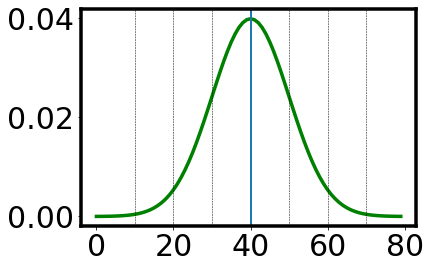

In [50]:
plt.plot(np.arange(0, 80), y, c='g')
plt.xticks(np.arange(0, 81, 20))
plt.axvline(x=40, linewidth = 2)
plt.axvline(x=50, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=30, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=60, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=20, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=70, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=10, linewidth = 0.5, color='k', ls='--')

In [51]:
y2 = [normal_p(x, 200, 50) for x in np.arange(0, 400)]

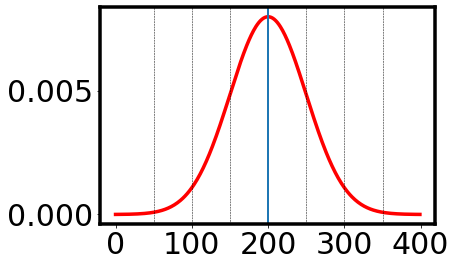

In [52]:
plt.plot(np.arange(0, 400), y2, c='r')
plt.xticks(np.arange(0, 401, 100))
plt.axvline(x=200, linewidth = 2)
plt.axvline(x=250, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=150, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=300, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=100, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=350, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=50, linewidth = 0.5, color='k', ls='--')

### 1) Gaussian distribution: mean = 40 ns , standard deviation = 10 ns , size = 1000

In [53]:
d1 = np.random.normal(loc=40, scale=10, size=1000)

In [54]:
gaussd1 = pd.DataFrame(data=d1, columns=['lifetime'])

In [55]:
gaussd1

,lifetime
0,43.785737
1,40.679253
2,36.328606
3,21.811331
4,26.134643
...,...
995,51.282270
996,42.089785
997,56.348890
998,38.060040


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f223b10>]],
      dtype=object)

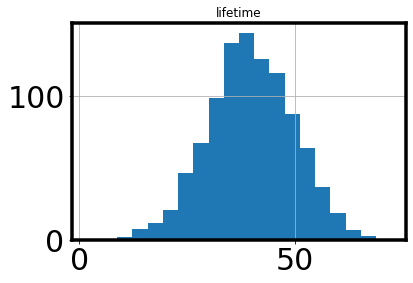

In [56]:
gaussd1.hist(bins=20)

In [57]:
d1_s = d1*1e-9

In [58]:
np.average(d1_s)

3.9854692267947454e-08

In [59]:
t_gauss= np.linspace(0, 1000, num= 1000)*1e-9

In [60]:
I_gauss = []

for i in range(len(d1_s)):
    I_gauss.append(generate_single_exp(t_gauss,d1_s[i]))
    
I_gauss = np.asarray(I_gauss)
I_avg_gauss = np.average(I_gauss,axis=0)

/Users/margheritataddei/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/margheritataddei/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


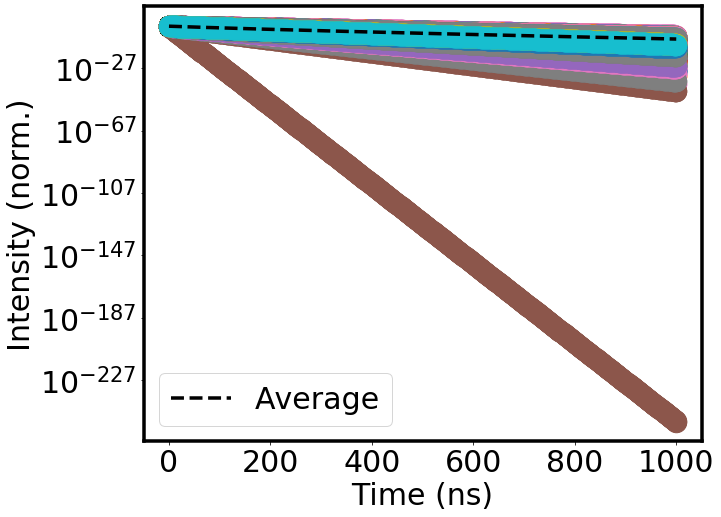

In [61]:
plt.figure(figsize=(10,8))
for i in range(len(d1_s)):
    plt.plot(t_gauss*1e9,I_gauss[i],'o')
plt.plot(t_gauss*1e9,I_avg_gauss,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [62]:
gauss_stretched_exp = stretch_exp_fit(I_avg_gauss/np.max(I_avg_gauss), t_gauss)
print("tau_c (ns) = "+str(gauss_stretched_exp[0]*1e9))
print("Beta = "+str(gauss_stretched_exp[1]))
print("avg. tau (ns) = "+str(gauss_stretched_exp[3]*1e9))

tau_c (ns) = 37.2554174026566
Beta = 0.9190449527637888
avg. tau (ns) = 38.76415627853865


In [63]:
gauss_double_exp = double_exp_fit(I_avg_gauss/np.max(I_avg_gauss), t_gauss)
print("tau1 (ns) = "+str(gauss_double_exp[0]*1e9))
print("a1 = "+str(gauss_double_exp[1]))
print("tau2 (ns) = "+str(gauss_double_exp[2]*1e9))
print("a2 = "+str(gauss_double_exp[3]))
print("avg. tau (ns) = "+str(gauss_double_exp[4]*1e9))

tau1 (ns) = 50.85051074210743
a1 = 0.43859906604356425
tau2 (ns) = 31.58276195296488
a2 = 0.5558024522395006
avg. tau (ns) = 40.08115668417078


In [64]:
gauss_single_exp = single_exp_fit(I_avg_gauss/np.max(I_avg_gauss), t_gauss)
print("tau (ns) = "+str(gauss_single_exp[0]*1e9))
print("a = "+str(gauss_single_exp[1]))
print("avg. tau (ns) = "+str(gauss_single_exp[2]*1e9))

tau (ns) = 42.5232208350042
a = 0.9394710079908223
avg. tau (ns) = 42.5232208350042


In this case, the most accurate fitting is the one with a double exponential and looking at the average tau, the actual average tau is around 40.24 and the error of the double exponential is of only +0.24 

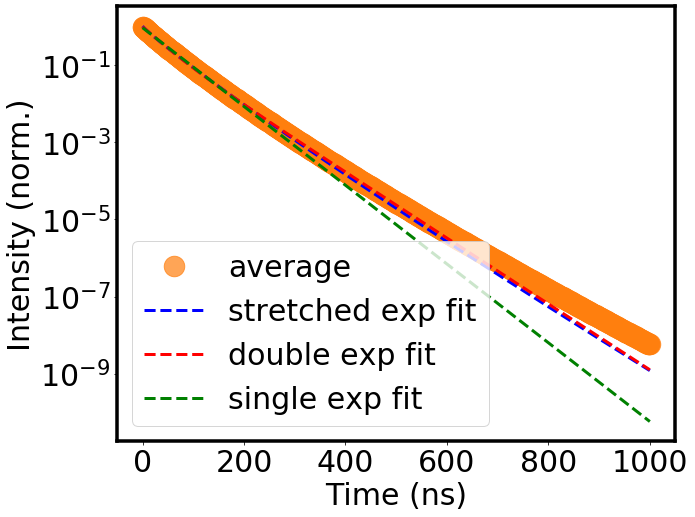

In [65]:
plt.figure(figsize=(10,8))
plt.plot(t_gauss*1e9, I_avg_gauss/np.max(I_avg_gauss),'C1o', alpha=0.7,label="average")
plt.plot(t_gauss*1e9, gauss_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_gauss*1e9, gauss_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_gauss*1e9, gauss_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### 2) Gaussian distribution: mean = 200 ns , standard deviation = 50 ns , size = 1000

In [66]:
d2 = np.random.normal(loc=200, scale=50, size=1000)

In [67]:
gaussd2 = pd.DataFrame(data=d2, columns=['lifetime'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20769790>]],
      dtype=object)

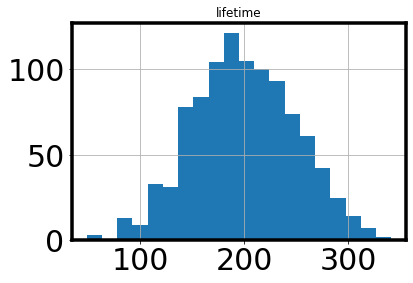

In [68]:
gaussd2.hist(bins=20)

In [69]:
d2_s = d2*1e-9

In [70]:
np.average(d2_s)

1.997130717233319e-07

In [71]:
t_gauss2= np.linspace(0, 5000, num= 1000)*1e-9

In [72]:
I_gauss2 = []

for i in range(len(d2_s)):
    I_gauss2.append(generate_single_exp(t_gauss2,d2_s[i]))
    
I_gauss2 = np.asarray(I_gauss2)
I_avg_gauss2 = np.average(I_gauss2,axis=0)

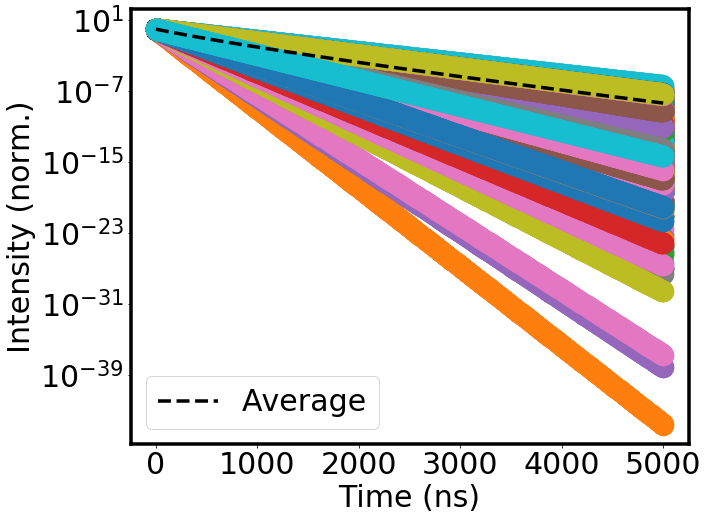

In [73]:
plt.figure(figsize=(10,8))
for i in range(len(d2_s)):
    plt.plot(t_gauss2*1e9,I_gauss2[i],'o')
plt.plot(t_gauss2*1e9,I_avg_gauss2,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [74]:
gauss2_stretched_exp = stretch_exp_fit(I_avg_gauss2/np.max(I_avg_gauss2), t_gauss2)
print("tau_c (ns) = "+str(gauss2_stretched_exp[0]*1e9))
print("Beta = "+str(gauss2_stretched_exp[1]))
print("avg. tau (ns) = "+str(gauss2_stretched_exp[3]*1e9))

tau_c (ns) = 186.47760141809482
Beta = 0.9191043738511531
avg. tau (ns) = 194.02289106061144


In [75]:
gauss2_double_exp = double_exp_fit(I_avg_gauss2/np.max(I_avg_gauss2), t_gauss2)
print("tau1 (ns) = "+str(gauss2_double_exp[0]*1e9))
print("a1 = "+str(gauss2_double_exp[1]))
print("tau2 (ns) = "+str(gauss2_double_exp[2]*1e9))
print("a2 = "+str(gauss2_double_exp[3]))
print("avg. tau (ns) = "+str(gauss2_double_exp[4]*1e9))

tau1 (ns) = 158.3529576127424
a1 = 0.5589774193337377
tau2 (ns) = 254.63337338000767
a2 = 0.4367393512487548
avg. tau (ns) = 200.58328611826408


In [76]:
gauss2_single_exp = single_exp_fit(I_avg_gauss2/np.max(I_avg_gauss2), t_gauss2)
print("tau (ns) = "+str(gauss2_single_exp[0]*1e9))
print("a = "+str(gauss2_single_exp[1]))
print("avg. tau (ns) = "+str(gauss2_single_exp[2]*1e9))

tau (ns) = 212.8109992777426
a = 0.9403575320418844
avg. tau (ns) = 212.8109992777426


Also in this case the best fitting function is the double exponential: avg.tau from double exp = 198.25 , avg.tau = 197.39

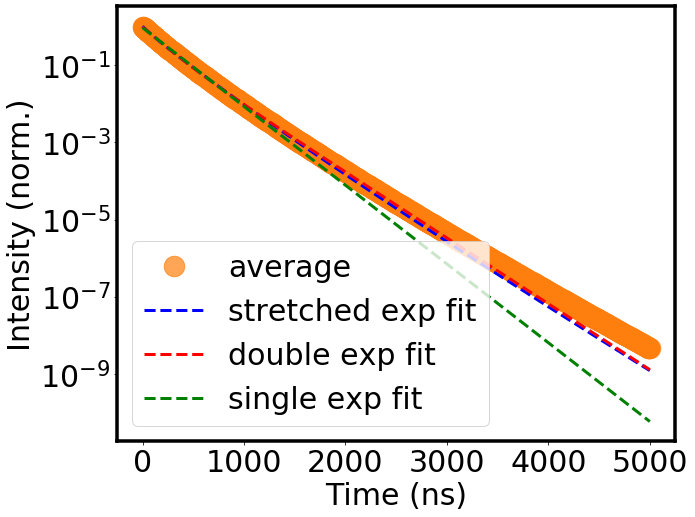

In [77]:
plt.figure(figsize=(10,8))
plt.plot(t_gauss2*1e9, I_avg_gauss2/np.max(I_avg_gauss2),'C1o', alpha=0.7,label="average")
plt.plot(t_gauss2*1e9, gauss2_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_gauss2*1e9, gauss2_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_gauss2*1e9, gauss2_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

## Poisson distribution of lifetimes

$
  P(k)=\frac{\lambda^k e^{-\lambda}}{k!}
$

$\lambda$ is the expected number of occurrences

For events with an expected separation $\lambda$ the Poisson distribution P(k) describes the probability of k events occurring within the observed interval $\lambda$.

Because the output is limited to the range of the C long type, a ValueError is raised when $\lambda$ is within 10 sigma of the maximum representable value.

In [78]:
def poisson_p(lamb, k):
    probability = math.pow(lamb, k) * math.exp(-lamb) / math.factorial(k)
    return probability

In [79]:
poisson_p(10, 100)

4.864649182067611e-63

In [80]:
poisson_p(50, 100)

1.6303193521477302e-10

In [81]:
p_y = [poisson_p(50, k) for k in np.arange(0, 100)]
p_y2 = [poisson_p(10, k) for k in np.arange(0, 100)]

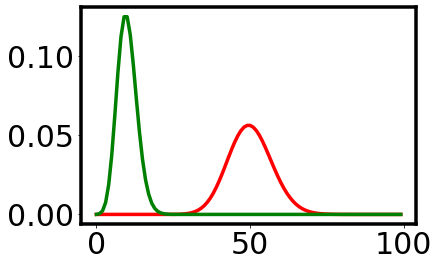

In [82]:
plt.plot(np.arange(0, 100), p_y, c='r')
plt.plot(np.arange(0, 100), p_y2, c='g')

In [83]:
tau_poisson = np.random.poisson(50, 100)

In [84]:
poiss = pd.DataFrame(data=tau_poisson, columns=['lifetime'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23870a90>]],
      dtype=object)

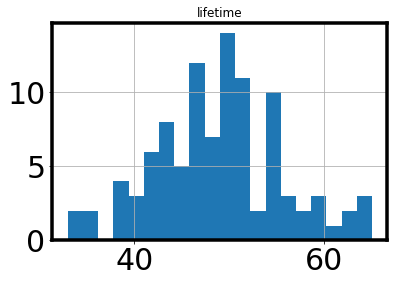

In [85]:
poiss.hist(bins=20)

In [86]:
tau_poisson_s = tau_poisson*1e-9

In [87]:
np.average(tau_poisson_s)

4.878e-08

In [88]:
t_poiss= np.linspace(0, 1000, num= 1000)*1e-9

In [89]:
I_poiss = []

for i in range(len(tau_poisson_s)):
    I_poiss.append(generate_single_exp(t_poiss,tau_poisson_s[i]))
    
I_poiss = np.asarray(I_poiss)
I_avg_poiss = np.average(I_poiss,axis=0)

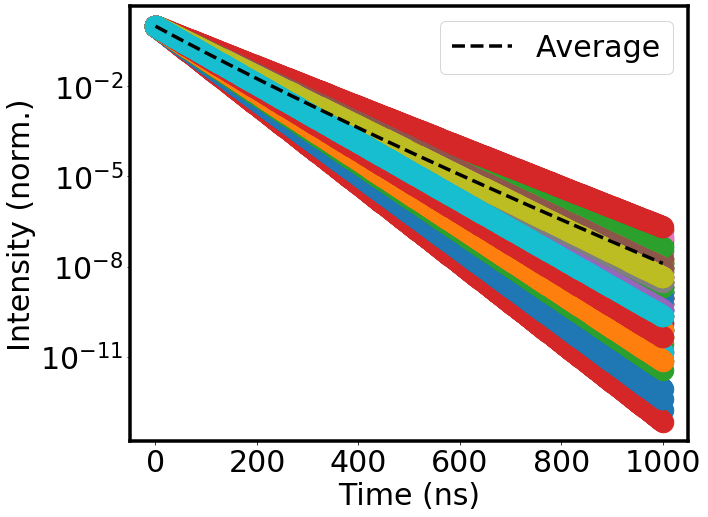

In [90]:
plt.figure(figsize=(10,8))
for i in range(len(tau_poisson_s)):
    plt.plot(t_poiss*1e9,I_poiss[i],'o')
plt.plot(t_poiss*1e9,I_avg_poiss,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [91]:
poiss_stretched_exp = stretch_exp_fit(I_avg_poiss/np.max(I_avg_poiss), t_poiss)
print("tau_c (ns) = "+str(poiss_stretched_exp[0]*1e9))
print("Beta = "+str(poiss_stretched_exp[1]))
print("avg. tau (ns) = "+str(poiss_stretched_exp[3]*1e9))

tau_c (ns) = 47.55295058391824
Beta = 0.9701757736368474
avg. tau (ns) = 48.189611679698764


In [92]:
poiss_double_exp = double_exp_fit(I_avg_poiss/np.max(I_avg_poiss), t_poiss)
print("tau1 (ns) = "+str(poiss_double_exp[0]*1e9))
print("a1 = "+str(poiss_double_exp[1]))
print("tau2 (ns) = "+str(poiss_double_exp[2]*1e9))
print("a2 = "+str(poiss_double_exp[3]))
print("avg. tau (ns) = "+str(poiss_double_exp[4]*1e9))

tau1 (ns) = 56.625150128675614
a1 = 0.41545950632076084
tau2 (ns) = 43.239928632501375
a2 = 0.5840671797536047
avg. tau (ns) = 48.80357950072926


In [93]:
poiss_single_exp = single_exp_fit(I_avg_poiss/np.max(I_avg_poiss), t_poiss)
print("tau (ns) = "+str(poiss_single_exp[0]*1e9))
print("a = "+str(poiss_single_exp[1]))
print("avg. tau (ns) = "+str(poiss_single_exp[2]*1e9))

tau (ns) = 49.72473900904185
a = 0.9809757988828031
avg. tau (ns) = 49.72473900904185


Also for the poisson distribution of lifetimes, the better fitting is with the double exponential where tau_avg is 50.35 and the effective one is 50.33 ns

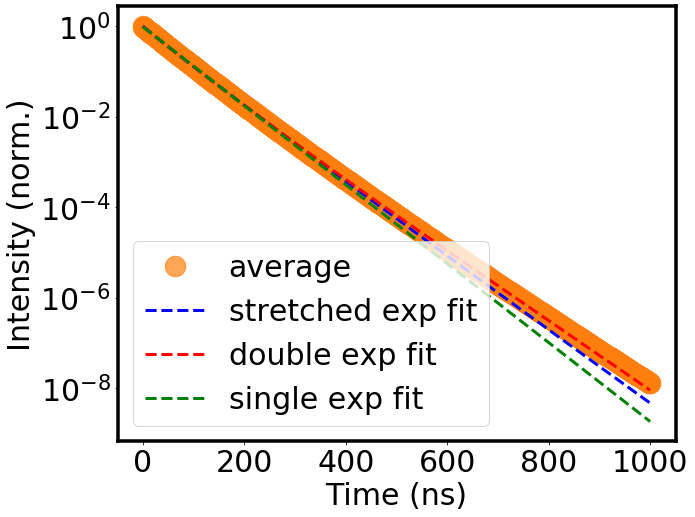

In [94]:
plt.figure(figsize=(10,8))
plt.plot(t_poiss*1e9, I_avg_poiss/np.max(I_avg_poiss),'C1o', alpha=0.7,label="average")
plt.plot(t_poiss*1e9, poiss_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_poiss*1e9, poiss_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_poiss*1e9, poiss_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Poisson distribution with lambda = 10 and k = 100 

In [95]:
tau_poisson2 = np.random.poisson(10, 100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23e32190>]],
      dtype=object)

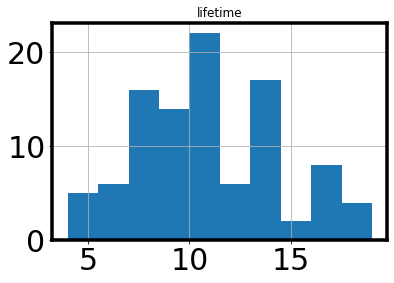

In [96]:
poiss2 = pd.DataFrame(data=tau_poisson2, columns=['lifetime'])

poiss2.hist(bins=10)

In [97]:
tau_poisson2_s = tau_poisson2*1e-9

np.average(tau_poisson2_s)

1.0660000000000004e-08

In [98]:
t_poiss2= np.linspace(0, 1000, num= 1000)*1e-9

I_poiss2 = []

for i in range(len(tau_poisson2_s)):
    I_poiss2.append(generate_single_exp(t_poiss2,tau_poisson2_s[i]))
    
I_poiss2 = np.asarray(I_poiss2)
I_avg_poiss2 = np.average(I_poiss2,axis=0)

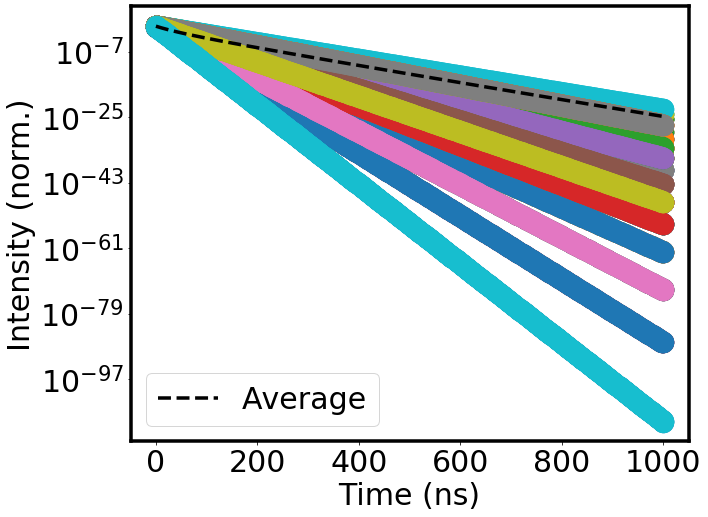

In [99]:
plt.figure(figsize=(10,8))
for i in range(len(tau_poisson2_s)):
    plt.plot(t_poiss2*1e9,I_poiss2[i],'o')
plt.plot(t_poiss2*1e9,I_avg_poiss2,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [100]:
poiss2_stretched_exp = stretch_exp_fit(I_avg_poiss2/np.max(I_avg_poiss2), t_poiss2)
print("tau_c (ns) = "+str(poiss2_stretched_exp[0]*1e9))
print("Beta = "+str(poiss2_stretched_exp[1]))
print("avg. tau (ns) = "+str(poiss2_stretched_exp[3]*1e9))

tau_c (ns) = 9.591519694351156
Beta = 0.8779815675051916
avg. tau (ns) = 10.233749334016586


In [101]:
poiss2_double_exp = double_exp_fit(I_avg_poiss2/np.max(I_avg_poiss2), t_poiss2)
print("tau1 (ns) = "+str(poiss2_double_exp[0]*1e9))
print("a1 = "+str(poiss2_double_exp[1]))
print("tau2 (ns) = "+str(poiss2_double_exp[2]*1e9))
print("a2 = "+str(poiss2_double_exp[3]))
print("avg. tau (ns) = "+str(poiss2_double_exp[4]*1e9))

tau1 (ns) = 8.205182903353899
a1 = 0.6269161940314301
tau2 (ns) = 15.069600449819301
a2 = 0.36637174045094645
avg. tau (ns) = 10.737105940344305


In [102]:
poiss2_single_exp = single_exp_fit(I_avg_poiss2/np.max(I_avg_poiss2), t_poiss2)
print("tau (ns) = "+str(poiss2_single_exp[0]*1e9))
print("a = "+str(poiss2_single_exp[1]))
print("avg. tau (ns) = "+str(poiss2_single_exp[2]*1e9))

tau (ns) = 11.88639909407248
a = 0.9052057811352068
avg. tau (ns) = 11.88639909407248


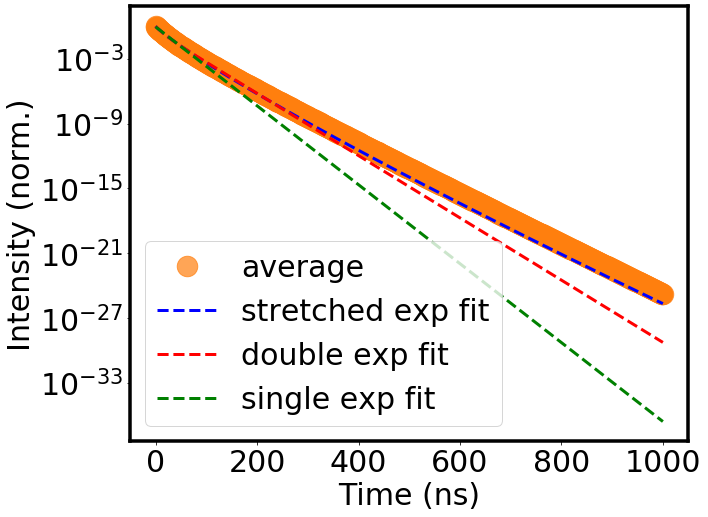

In [103]:
plt.figure(figsize=(10,8))
plt.plot(t_poiss2*1e9, I_avg_poiss2/np.max(I_avg_poiss2),'C1o', alpha=0.7,label="average")
plt.plot(t_poiss2*1e9, poiss2_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_poiss2*1e9, poiss2_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_poiss2*1e9, poiss2_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

Also in this case, the double exponential is better fitting the average function giving a value of tau_avg: 9.89 ns (Vs 9.82 ns)